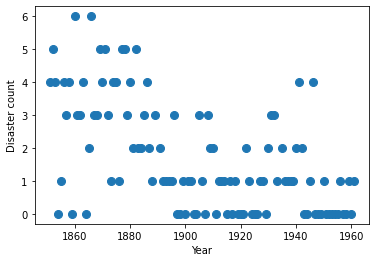

In [14]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
                           1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                           0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                           3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                           0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [36]:
print(years)

[1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864
 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878
 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892
 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906
 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920
 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961]


In [22]:
print(disaster_data)

0      4.0
1      5.0
2      4.0
3      0.0
4      1.0
      ... 
106    0.0
107    0.0
108    1.0
109    0.0
110    1.0
Length: 111, dtype: float64


In [28]:
import random
to_remove = 3
data = disaster_data
data.loc[list(data.loc[random.sample(list(data.index), to_remove)].index)] = np.nan
# df.loc[df.B > 5, :] = np.nan 

In [3]:
from prior_views.ModelConversion import data_reduce_series

data_reduced = data_reduce_series(disaster_data, .95)

In [29]:
data

0      4.0
1      5.0
2      4.0
3      0.0
4      1.0
      ... 
106    0.0
107    0.0
108    1.0
109    0.0
110    1.0
Length: 111, dtype: float64

In [ ]:
data = disaster_data.replace(to_replace=disaster_data.sample(frac=.05,), value=np.nan)
data_1 = disaster_data.replace(to_replace=disaster_data.sample(frac=.2,), value=np.nan)

In [114]:
data.tail()

106    0.0
107    0.0
108    1.0
109    0.0
110    1.0
dtype: float64

In [15]:
m_kwars = dict(early_rate_lambda=1, late_rate_lambda=1)

In [16]:
def model_method(data, **kwargs):
    with pm.Model() as disaster_model:
        switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper = years.max(),testval=1900)

        early_rate = pm.Exponential('early_rate', kwargs['early_rate_lambda'])
        late_rate = pm.Exponential('late_rate', kwargs['late_rate_lambda'])

        rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

        disasters = pm.Poisson('disasters', rate, observed=data)

    return disaster_model

In [5]:
def new_model(model_fun, data, **kwargs):
    for key, val in kwargs.items():
        kwargs[key] = val + (val*.2)

    model = model_fun(data, **kwargs)
    return model

In [19]:
%reload_ext autoreload
%autoreload 2
from prior_views.model import model

new_model = model(model_method, disaster_data, m_kwars)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The number of effective samples is smaller than 10% for some parameters.


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [82]:
new_model(model_method, disaster_data, **m_kwars)

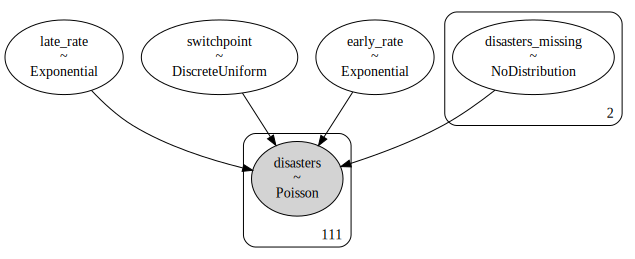

In [68]:
mod = model_method(disaster_data, **m_kwars)
pm.model_to_graphviz(mod)

In [57]:
import inspect

args = model_method()


{'early_rate_lambda': 1,
 'late_rate_lambda': 1,
 'data': 0      4.0
 1      5.0
 2      4.0
 3      0.0
 4      1.0
       ... 
 106    0.0
 107    0.0
 108    1.0
 109    0.0
 110    1.0
 Length: 111, dtype: float64}

In [46]:
sig.replace('data')

TypeError: replace() takes 1 positional argument but 2 were given

<Parameter "data=0      4.0
1      5.0
2      4.0
3      0.0
4      1.0
      ... 
106    0.0
107    0.0
108    1.0
109    0.0
110    1.0
Length: 111, dtype: float64">

In [6]:
with pm.Model() as disaster_model_1:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper = years.max(),testval=1900)



    early_rate = pm.Exponential('early_rate', .8)
    late_rate = pm.Exponential('late_rate', .8)

    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

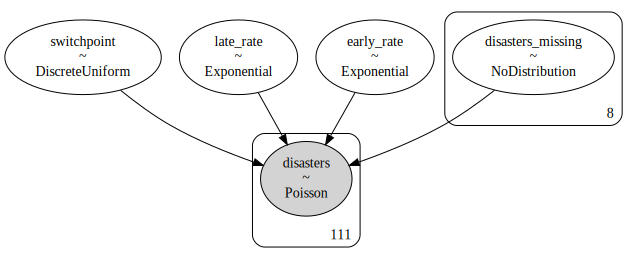

In [5]:
pm.model_to_graphviz(disaster_model_1)

In [107]:
with pm.Model() as disaster_model_2:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper = years.max(),testval=1900)



    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=data_1)

In [108]:
with pm.Model() as disaster_model_3:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper = years.max(),testval=1900)



    early_rate = pm.Exponential('early_rate', 1.2)
    late_rate = pm.Exponential('late_rate', 1.2)

    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

In [6]:
with disaster_model_1:
    trace = pm.sample()
    prior = pm.sample_prior_predictive()
    posterior = pm.sample_posterior_predictive(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [8]:
import arviz as az
import panel as pn

with disaster_model_1:
        trace = pm.sample()
        prior = pm.sample_prior_predictive()
        posterior = pm.sample_posterior_predictive(trace)
        data = az.from_pymc3(
                        trace=trace,
                        prior=prior,
                        posterior_predictive=posterior,
                )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
data.posterior

<xarray.Dataset>
Dimensions:                  (chain: 4, disasters_missing_dim_0: 2, draw: 1000)
Coordinates:
  * chain                    (chain) int64 0 1 2 3
  * draw                     (draw) int64 0 1 2 3 4 5 ... 995 996 997 998 999
  * disasters_missing_dim_0  (disasters_missing_dim_0) int64 0 1
Data variables:
    switchpoint              (chain, draw) int64 1889 1889 1889 ... 1892 1892
    disasters_missing        (chain, draw, disasters_missing_dim_0) int64 0 ... 4
    early_rate               (chain, draw) float64 2.888 2.872 ... 3.41 3.889
    late_rate                (chain, draw) float64 0.9054 1.051 ... 0.9694 1.043
Attributes:
    created_at:                 2020-08-12T11:36:38.747819
    arviz_version:              0.9.0
    inference_library:          pymc3
    inference_library_version:  3.9.2
    sampling_time:              3.7086660861968994
    tuning_steps:               1000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f888a652ad0>],
      dtype=object)

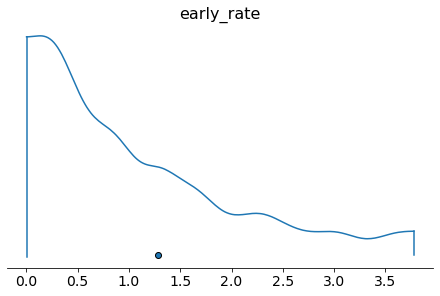

In [104]:
az.plot_density(pm_data,group='prior', var_names='early_rate')

In [5]:
def convert_models(models=[]):
    model_data = []
    for m in models:
        with m:
            trace = pm.sample(1000)
            prior = pm.sample_prior_predictive(1000)
            posterior = pm.sample_posterior_predictive(trace)
            data = az.from_pymc3(
                        trace=trace,
                        prior=prior,
                        posterior_predictive=posterior,
                        model=d
                    )
            model_data.append(data)
    return model_data

In [109]:
m = [disaster_model_1, disaster_model_2, disaster_model_3]
# data_m = convert_models(m)
# models = {
#   "prior_.8": data_m[0],
#   "prior_1": data_m[1],
#   "prior_1.2": data_m[2]
# }

In [21]:
v = None
v = list(mods.values())[0]
v

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

In [110]:
from prior_views.ModelConversion import convert_models

mods = convert_models(m)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [65]:
import bokeh as Bokeh
import bokeh.plotting as bkp
from bokeh.models import Div
from bokeh.layouts import column, row
from bokeh.io import curdoc
import arviz as az
import panel as pn


def prior_density_plot(variable='switchpoint',data=mods, plottype='Same Plots'):
    """
    Method for producing the prior kde plot using arviz plot_density. This is done 2 ways: either will produce all     the plots onto one graph or will produe them seperately

    The parameters are the data, plottype, either "Seperate Plots" or "Same Plots" 

    Also takes the variable to view which will be chosen by the dropdown in the program. Probably shouldnt be          hardcoded with a default as this will change with each model.  *** Will change later ***
    """
    if plottype == 'Seperate Plots':
        plots = []
        for key, value in data.items():
            kwg = dict(title=key, width=1000)
            curdoc().theme = 'dark_minimal'
            plot = az.plot_density(
                value,
                group='prior', 
                var_names=variable,
                outline=False, 
                backend='bokeh',
                shade=.5, 
                show=False,
                backend_kwargs=kwg,
                )
            for p in plot[0]:
                p.title.text = key+' '+p.title.text 
            """ ** Can't get the title to change with kwargs so workaround with html div ** """
            plots.append(column(Div(text='<h2>'+key+'</h2>'),row(plot[0].tolist(), sizing_mode='scale_both')))
        col = column(plots)
    else:
        curdoc().theme = 'dark_minimal'
        kwg = dict(height=350, width=500,toolbar_location='right')
        plot = az.plot_density(
            list(data.values()), 
            group='prior', 
            var_names=variable,
            outline=False,  
            backend='bokeh',
            shade=.5, 
            show=False, 
            colors='cycle',
            data_labels=list(data.keys()),
            backend_kwargs=kwg,
            )
        return plot
    return col

pl = prior_density_plot()

In [67]:
pl[0,0].min_border_top = 10

In [68]:
from bokeh.models import Legend
from bokeh.plotting import figure

for p in pl[0]:
    l = p.legend[0]
    p.legend.location = 'bottom_left'
    l.location = (10,-10)
    l.orientation = "vertical"
    p.add_layout(l, place='right')

pn.serve(pl[0,0])


Launching server at http://localhost:61416


In [111]:
%reload_ext autoreload
%autoreload 2
from prior_views.CreateApp import prior_checking_tool, create_app

prior_checking_tool(mods)

Launching server at http://localhost:65406


In [35]:
import bokeh as Bokeh
import bokeh.plotting as bkp
from bokeh.models import Div
from bokeh.layouts import column, row
from bokeh.io import curdoc

def prior_density_plot(variable,data=models, plottype='Seperate Plots'):
    """
    Method for producing the prior kde plot using arviz plot_density. This is done 2 ways: either will produce all     the plots onto one graph or will produe them seperately

    The parameters are the data, plottype, either "Seperate Plots" or "Same Plots" 

    Also takes the variable to view which will be chosen by the dropdown in the program. Probably shouldnt be          hardcoded with a default as this will change with each model.  *** Will change later ***
    """
    if plottype == 'Seperate Plots':
        plots = []
        for key, value in data.items():
            kwg = dict(title=key)
            curdoc().theme = 'dark_minimal'
            plot = az.plot_density(
                value,
                group='prior', 
                var_names=variable,
                outline=False, 
                backend='bokeh',
                shade=.5, 
                show=False,
                backend_kwargs=kwg,
                num_pp_samples=1,
                )
            """ ** Can't get the title to change with kwargs so workaround with html div ** """
            plots.append(column(Div(text='<h2>'+key+'</h2>'),row(plot[0].tolist(), sizing_mode='scale_both')))
        col = column(plots)
    else:
        curdoc().theme = 'dark_minimal'
        plot = az.plot_density(
            list(data.values()), 
            group='prior', 
            var_names=variable,
            outline=False,  
            backend='bokeh',
            shade=.5, 
            show=False, 
            colors='cycle'
            )
        col = column(plot[0].tolist())
    return col


def posterior_density_plot(data=models, plottype='Seperate Plots', variable='switchpoint'):
    """
    Basically the sama as the prior density plot but uses the posterior instead. Could have resused the same           method with an extra param but the panel.interact method tries to create features for parameter selection          which i dont want in this case

    *** will try to find a workaround for this feature to reduce unnescesary code copying***
    """
    if plottype == 'Seperate Plots':
        plots = []
        for key,value in data.items():
            curdoc().theme = 'dark_minimal'
            kwg = dict(title=key)
            plot = az.plot_density(
                value, 
                group='posterior', 
                var_names=variable, 
                backend='bokeh',
                outline=False,
                shade=.5, 
                show=False,
                backend_kwargs=kwg
                )
            plots.append(column(Div(text='<h2>'+key+'</h2>'),row(plot[0].tolist(), sizing_mode='scale_both')))
        col = column(plots)
    else:
        curdoc().theme = 'dark_minimal'
        plot = az.plot_density(
            list(data.values()), 
            group='posterior', 
            var_names=variable, 
            backend='bokeh',
            shade=.5, 
            show=False, 
            colors='cycle',
            outline=False, 
            )
        col = column(plot[0].tolist())
    return col


def prior_predictive_density_plot(data=models, variable="switchpoint"):
    plots = []
    for key, value in data.items():
        kwg = dict(title=key)
        curdoc().theme = 'dark_minimal'
        plot = az.plot_ppc(
            value, 
            group='prior', 
            var_names=variable, 
            backend='bokeh',
            alpha=.5, 
            show=False,
            backend_kwargs=kwg
            )
        plots.append(column(Div(text='<h2>'+key+'</h2>'),row(plot[0].tolist(), sizing_mode='scale_both')))
    col = column(plots)
    return col

def posterior_predictive_density_plot(data=models,variable="switchpoint"):
    plots = []
    for key, value in data.items():
        kwg = dict(title=key)
        curdoc().theme = 'dark_minimal'
        plot = az.plot_ppc(
            value, 
            group='posterior', 
            var_names=variable, 
            backend='bokeh',
            alpha=.5, 
            show=False,
            backend_kwargs=kwg
            )
        plots.append(row(plot[0].tolist(), sizing_mode='scale_both'))
    col = column(plots)
    return col


def sample_trace_plot(data=models,variable="switchpoint"):
    plots = []
    for key, value in data.items():
        kwg = dict(height=200,title=key)
        curdoc().theme = 'dark_minimal'
        plot = az.plot_trace(
            value, 
            var_names=variable, 
            backend='bokeh', 
            show=False,
            backend_kwargs=kwg
            )
        plots.append(column(Div(text='<h2>'+key+'</h2>'),row(plot[0].tolist(), sizing_mode='scale_both')))
    col = column(plots)
    return col

In [22]:
p = prior_predictive_density_plot(models, variable='disasters')
pn.serve(p)

Launching server at http://localhost:49823


In [24]:
    from bokeh.plotting import curdoc, figure
    import arviz as az

    kwg = dict(height=200,title='plot')    
    curdoc().theme = 'dark_minimal'
    plot = az.plot_trace(
        pm_data, 
        var_names=None, 
        backend='bokeh', 
        backend_kwargs=kwg,
        show=False
        )
    pn.serve(plot)

Launching server at http://localhost:54467


In [29]:
from bokeh.layouts import row

az.style.use("arviz-darkgrid")
plots = []
for value in data_m:
    plot = az.plot_density(value, group='posterior', var_names='disasters_missing', backend='bokeh',shade=.5, show=False)
    plots.append(row(plot[0].tolist()))
grid = column(plots)
pn.serve(grid)
# grid = row(plots)
# g = column(grid)
# pn.serve(grid)

Launching server at http://localhost:51152


In [36]:
from bokeh.plotting import show



pn.extension()

radio_group = pn.widgets.RadioButtonGroup(
    name='Radio Button Group', options=['Same Plot', 'Seperate Plots'], button_type='success')

def prior_view_tab():
    kw = dict(variable=sorted(list(pm_data.prior.data_vars)), plottype=radio_group)
    i = pn.interact(prior_density_plot, **kw)
    text = "Hey"
    p = pn.Row(text,pn.Row(pn.Column(i[0][1],i[0][0]),i[1]))
    return p



def posterior_view_tab():
    kw = dict(variable=sorted(list(pm_data.posterior.data_vars)),plottype=radio_group)
    i = pn.interact(posterior_density_plot, **kw)
    text = "Hey"
    p = pn.Row(text,pn.Row(pn.Column(i[0][1],i[0][0]),i[1]))
    return p

def prior_predictive_view_tab():
    kw = dict(variable=sorted(list(pm_data.prior_predictive.data_vars)))
    i = pn.interact(prior_predictive_density_plot, **kw)
    text = "Hey"
    p = pn.Row(text,pn.Row(i[0],i[1]))
    return p

def posterior_predictive_view_tab():
    kw = dict(variable=sorted(list(pm_data.posterior_predictive.data_vars)))
    i = pn.interact(posterior_predictive_density_plot, **kw)
    text = "Hey"
    p = pn.Row(text,pn.Row(i[0],i[1]))
    return p

def sample_trace_view_tab():
    kw = dict(variable=sorted(list(pm_data.posterior.data_vars)))
    i = pn.interact(sample_trace_plot, **kw)
    text = "Hey"
    p = pn.Row(text,pn.Row(i[0],i[1]))
    return p

In [38]:
tabs = pn.Tabs(('Prior', prior_view_tab),('Prior Predictive', prior_predictive_view_tab),('Posterior', posterior_view_tab),('Posterior Predictive',posterior_predictive_view_tab),('Sample Trace', sample_trace_view_tab))
pn.serve(tabs)

Launching server at http://localhost:56950
